In [109]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import ast
import seaborn as sns
import matplotlib.pyplot as plt

In [110]:
credits_df = pd.read_csv('dataset/credits.csv')
titles_df = pd.read_csv('dataset/titles.csv')

In [111]:
# This cell checks all the movies/shows that are not in the credits_csv file
credits_movie_ids = set(credits_df['id'])
titles_movie_ids = set(titles_df['id'])

# Find movie ids that are in titles but not in credits
movies_not_in_credits = titles_df[~titles_df['id'].isin(credits_movie_ids)]
movies_not_in_credits

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600000,NaN
145,ts251477,My First Errand,SHOW,“Hajimete no Otsukai” (First Errand) is a Japa...,1991,TV-G,18,"['documentation', 'family', 'reality']",['JP'],12.0,NaN,NaN,NaN,7.730000,7.8
249,tm997728,Blade Runner: The Final Cut,MOVIE,"Visually spectacular, intensely action-packed ...",2007,R,117,"['action', 'thriller', 'scifi']",['US'],NaN,NaN,NaN,NaN,0.055091,9.0
332,ts33559,Shaun the Sheep,SHOW,Shaun the Sheep thinks and acts like a person ...,2007,TV-G,7,"['animation', 'comedy', 'family', 'european']",['GB'],6.0,tt0983983,8.1,28.0,31.375000,7.9
360,ts98340,Metallica: Some Kind of Monster,SHOW,This collection includes the acclaimed rock do...,2004,TV-MA,84,['western'],"['CA', 'US']",1.0,tt6954486,NaN,NaN,0.893000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5842,tm1066324,Super Monsters: Once Upon a Rhyme,MOVIE,The Super Monsters rethink exemplary fantasies...,2021,NaN,25,"['animation', 'family']",[],NaN,tt14586752,5.6,38.0,53.762000,6.3
5844,tm1074617,Bling Empire - The Afterparty,MOVIE,"The stars of ""Bling Empire"" discuss the show's...",2021,NaN,35,[],['US'],NaN,NaN,NaN,NaN,NaN,NaN
5846,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,NaN,134,['drama'],[],NaN,tt11803618,7.7,348.0,NaN,NaN
5848,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,"Jamie Foxx, David Alan Grier and more from the...",2021,PG-13,37,[],['US'],NaN,NaN,NaN,NaN,1.296000,10.0


In [112]:
# Group by movie id and aggregate the data into lists
grouped_credits_df = credits_df.groupby('id').agg({
    'person_id': lambda x: list(x),
    'name': lambda x: list(x),
    'character': lambda x: list(x),
    'role': lambda x: list(x)
}).reset_index()

# Separate actors and directors into new columns
grouped_credits_df['actor'] = [[name for name, role in zip(names, roles) if role == 'ACTOR'] for names, roles in zip(grouped_credits_df['name'], grouped_credits_df['role'])]
grouped_credits_df['director'] = [[name for name, role in zip(names, roles) if role == 'DIRECTOR'] for names, roles in zip(grouped_credits_df['name'], grouped_credits_df['role'])]

# Drop unnecessary columns
grouped_credits_df.drop(['name', 'role'], axis=1, inplace=True)
grouped_credits_df


,id,person_id,character,actor,director
0,tm1000037,"[251702, 41192, 589580, 191901, 237433, 76618,...","[Maxi, Karl, Alex, Ante, Jitka, Pankraz, Didie...","[Luna Wedler, Jannis Niewöhner, Milan Peschel,...",[Christian Schwochow]
1,tm1000147,"[5080, 159223, 35608, 595294, 9714, 60547, 772...","[David Carmichael, Jane, Marlon Veidt, Joseph ...","[Guy Pearce, Matilda Anna Ingrid Lutz, Travis ...",[Andrew Baird]
2,tm100015,"[1675, 2673, 13138, 5130, 13145, 13137, 10712,...","[Gordon Jennings, John Rahway, Jack Welles, Ja...","[Idris Elba, Paul Walker, Matt Dillon, Michael...",[John Luessenhop]
3,tm1000166,"[248002, 1793972, 930514, 1794044, 1793676, 24...","[Himself, Himself, Herself, Herself, Himself, ...","[Glenn Fredly, Marcello Tahitoe, Andien Aisyah...",[Saron Sakina]
4,tm1000185,"[1562688, 299215, 106368, 254540, 97525, 20121...","[Monika/Klaudia, Enzo, Ojciec Moniki, Ilona, J...","[Adrianna Chlebicka, Mateusz Banasiuk, Mirosła...",[Filip Zylber]
...,...,...,...,...,...
5484,ts97584,"[1323916, 1324096]","[Himself - Host, nan]",[Sebastian Perry],[William Mitchell]
5485,ts9794,[32954],[Self - Host],[Jerry Seinfeld],[]
5486,ts98252,"[9240, 1950, 9232, 22676, 5664, 8709, 916, 630...","[Skipper (voice), Rico the Penguin (voice), Me...","[Tom McGrath, John DiMaggio, David Schwimmer, ...",[]
5487,ts98316,[4824],[Narrator],[John Hurt],[]


In [113]:
# Merge titles dataframe with grouped credits dataframe
grouped_combined_df = pd.merge(titles_df, grouped_credits_df, left_on = "id", right_on = "id")

# Drop N/A titles and character column
grouped_combined_df = grouped_combined_df.drop('character', axis=1)
grouped_combined_df.dropna(subset=['title'], inplace=True)
grouped_combined_df

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,actor,director
0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179,"[3748, 14658, 7064, 3739, 48933, 32267, 519612...","[Robert De Niro, Jodie Foster, Albert Brooks, ...",[Martin Scorsese]
1,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300,"[10103, 13020, 6639, 11224, 24509, 80069, 8403...","[Jon Voight, Burt Reynolds, Ned Beatty, Ronny ...",[John Boorman]
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811,"[11472, 1549, 11474, 11473, 11475, 11476, 4089...","[Graham Chapman, John Cleese, Eric Idle, Terry...","[Terry Jones, Terry Gilliam]"
3,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600,"[35196, 1050, 16868, 14351, 35197, 35200, 1061...","[Lee Marvin, Ernest Borgnine, Charles Bronson,...",[Robert Aldrich]
4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,tt0063929,8.8,73424.0,17.617,8.306,"[11472, 11476, 11475, 11474, 11473]","[Graham Chapman, Michael Palin, Terry Jones, E...",[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5484,tm1216735,Sun of the Soil,MOVIE,"In 14th-century Mali, an ambitious young royal...",2022,NaN,26,[],[],NaN,NaN,NaN,NaN,1.179,7.000,[1785287],[],[Joe Penney]
5485,tm985215,Princess 'Daya'Reese,MOVIE,Reese is a con artist from Manila who dreams o...,2021,NaN,115,"['comedy', 'romance']",['PH'],NaN,tt13399802,7.1,50.0,1.383,NaN,"[757428, 757395, 134442, 143411, 206514, 26073...","[Maymay Entrata, Edward Barber, Snooky Serna, ...",[Barry Gonzalez]
5486,tm1097142,My Bride,MOVIE,The story follows a young man and woman who go...,2021,NaN,93,"['romance', 'comedy', 'drama']",['EG'],NaN,tt14216488,5.0,327.0,2.545,5.300,"[247928, 710979, 1813868, 817494, 1459769, 119...","[Ahmed Hatem, Jamila Awad, Mahmoud Al-Bezzawy,...",[Mohamed Bakir]
5487,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.8,45.0,1.466,NaN,"[269015, 2151684, 361605, 1018894, 618764, 678...","[Richard Mofe-Damijo, Ego Nwosu, Keppy Ekpenyo...",[Seyi Babatope]


In [114]:
# Merge titles dataframe with credits dataframe
combined_df = pd.merge(titles_df, credits_df, left_on = "id", right_on = "id")

# Drop N/A titles and character column
combined_df = combined_df.drop('character', axis=1)
combined_df.dropna(subset=['title'], inplace=True)
combined_df

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,role
0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179,3748,Robert De Niro,ACTOR
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179,14658,Jodie Foster,ACTOR
2,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179,7064,Albert Brooks,ACTOR
3,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179,3739,Harvey Keitel,ACTOR
4,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179,48933,Cybill Shepherd,ACTOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77796,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],NaN,tt14585902,3.8,68.0,26.005,6.300,736339,Adelaida Buscato,ACTOR
77797,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],NaN,tt14585902,3.8,68.0,26.005,6.300,399499,Luz Stella Luengas,ACTOR
77798,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],NaN,tt14585902,3.8,68.0,26.005,6.300,373198,Inés Prieto,ACTOR
77799,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],NaN,tt14585902,3.8,68.0,26.005,6.300,378132,Isabel Gaona,ACTOR


In [115]:
movies = grouped_combined_df[grouped_combined_df['type'] != 'SHOW']
movies = movies.drop('seasons', axis=1)
movies.reset_index(drop=True, inplace=True)
movies

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,actor,director
0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],tt0075314,8.2,808582.0,40.965,8.179,"[3748, 14658, 7064, 3739, 48933, 32267, 519612...","[Robert De Niro, Jodie Foster, Albert Brooks, ...",[Martin Scorsese]
1,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],tt0068473,7.7,107673.0,10.010,7.300,"[10103, 13020, 6639, 11224, 24509, 80069, 8403...","[Jon Voight, Burt Reynolds, Ned Beatty, Ronny ...",[John Boorman]
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],tt0071853,8.2,534486.0,15.461,7.811,"[11472, 1549, 11474, 11473, 11475, 11476, 4089...","[Graham Chapman, John Cleese, Eric Idle, Terry...","[Terry Jones, Terry Gilliam]"
3,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",tt0061578,7.7,72662.0,20.398,7.600,"[35196, 1050, 16868, 14351, 35197, 35200, 1061...","[Lee Marvin, Ernest Borgnine, Charles Bronson,...",[Robert Aldrich]
4,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],tt0079470,8.0,395024.0,17.770,7.800,"[11472, 1549, 11473, 11474, 11475, 11476, 1147...","[Graham Chapman, John Cleese, Terry Gilliam, E...",[Terry Jones]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3643,tm1216735,Sun of the Soil,MOVIE,"In 14th-century Mali, an ambitious young royal...",2022,NaN,26,[],[],NaN,NaN,NaN,1.179,7.000,[1785287],[],[Joe Penney]
3644,tm985215,Princess 'Daya'Reese,MOVIE,Reese is a con artist from Manila who dreams o...,2021,NaN,115,"['comedy', 'romance']",['PH'],tt13399802,7.1,50.0,1.383,NaN,"[757428, 757395, 134442, 143411, 206514, 26073...","[Maymay Entrata, Edward Barber, Snooky Serna, ...",[Barry Gonzalez]
3645,tm1097142,My Bride,MOVIE,The story follows a young man and woman who go...,2021,NaN,93,"['romance', 'comedy', 'drama']",['EG'],tt14216488,5.0,327.0,2.545,5.300,"[247928, 710979, 1813868, 817494, 1459769, 119...","[Ahmed Hatem, Jamila Awad, Mahmoud Al-Bezzawy,...",[Mohamed Bakir]
3646,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"['romance', 'drama']",['NG'],tt13857480,6.8,45.0,1.466,NaN,"[269015, 2151684, 361605, 1018894, 618764, 678...","[Richard Mofe-Damijo, Ego Nwosu, Keppy Ekpenyo...",[Seyi Babatope]


In [116]:
shows = grouped_combined_df[grouped_combined_df['type'] != 'MOVIE']
shows.reset_index(drop=True, inplace=True)
shows

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,actor,director
0,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,tt0063929,8.8,73424.0,17.617,8.306,"[11472, 11476, 11475, 11474, 11473]","[Graham Chapman, Michael Palin, Terry Jones, E...",[]
1,ts45948,Monty Python's Fliegender Zirkus,SHOW,Monty Python's Fliegender Zirkus consisted of ...,1972,TV-MA,43,['comedy'],[],1.0,tt0202477,8.1,2151.0,1.487,7.000,"[11472, 1549, 11474, 11475, 11476, 16383]","[Graham Chapman, John Cleese, Eric Idle, Terry...",[Ian MacNaughton]
2,ts20681,Seinfeld,SHOW,A stand-up comedian and his three offbeat frie...,1989,TV-PG,24,['comedy'],['US'],9.0,tt0098904,8.9,308824.0,130.213,8.301,"[32954, 12464, 43320, 12018]","[Jerry Seinfeld, Jason Alexander, Michael Rich...",[]
3,ts22082,Knight Rider,SHOW,"Michael Long, an undercover police officer, is...",1982,TV-PG,51,"['scifi', 'action', 'crime', 'drama']",['US'],4.0,tt0083437,6.9,34115.0,50.267,7.500,"[8464, 63898, 30068, 90786, 90788]","[David Hasselhoff, Edward Mulhare, William Dan...",[]
4,ts21715,Thomas & Friends,SHOW,Thomas & Friends is a British children's telev...,1984,TV-Y,10,"['animation', 'family', 'comedy', 'fantasy', '...",['GB'],24.0,tt0086815,6.5,5104.0,42.196,6.500,[1381431],[Rachael Louise Miller],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1835,ts270616,We Are: The Brooklyn Saints,SHOW,A Brooklyn youth football program and its self...,2021,TV-14,47,"['documentation', 'sport']",['US'],1.0,tt13656220,6.5,162.0,2.523,10.000,[801018],[],[Rudy Valdez]
1836,ts287729,Alma Matters: Inside the IIT Dream,SHOW,"In a ""nation of middle-class"" the IIT dream in...",2021,TV-MA,49,"['documentation', 'drama']",['IN'],1.0,tt14512938,8.3,2346.0,1.493,9.000,"[1913337, 1913613, 1913389, 1913487, 1913928, ...","[Shubham Agarwal, Lokesh Deshmukh, Mukul Sanku...","[Pratik Patra, Prashant Raj]"
1837,ts287687,Lava Ka Dhaava,SHOW,Actor Jaaved Jaafferi brings his signature hum...,2021,NaN,30,['reality'],['IO'],1.0,tt14492912,6.1,42.0,1.499,NaN,"[48009, 104195]","[Javed Jaffrey, Rutledge Wood]",[]
1838,ts319608,The Family That Sings Together: The Camargos,SHOW,"Surrounded by family and friends, Zezé Di Cama...",2021,NaN,39,"['documentation', 'music', 'reality']",['BR'],1.0,tt16260968,5.3,45.0,1.002,NaN,"[407641, 915969]","[Zezé di Camargo, Wanessa Camargo]",[]


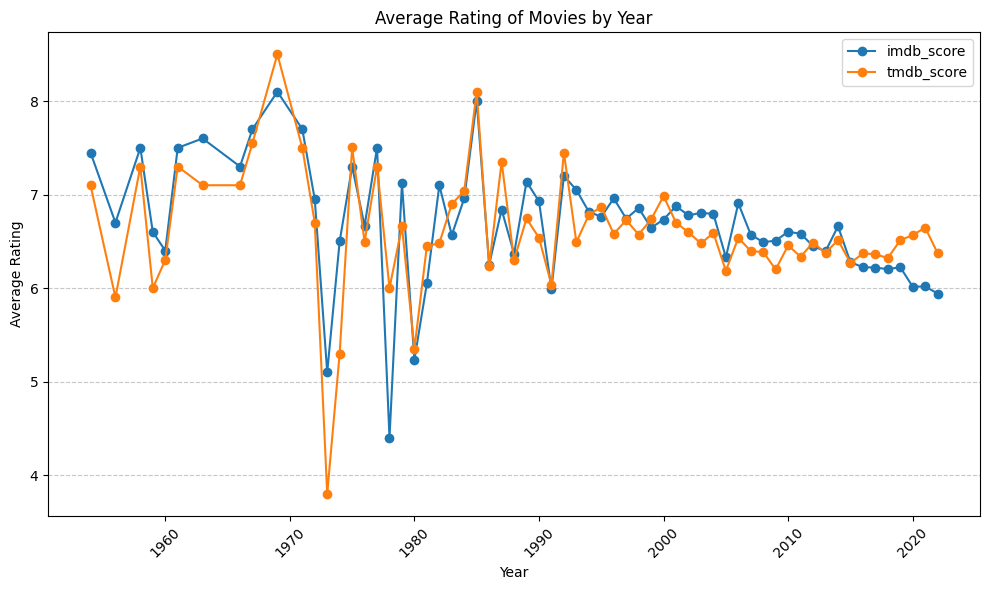

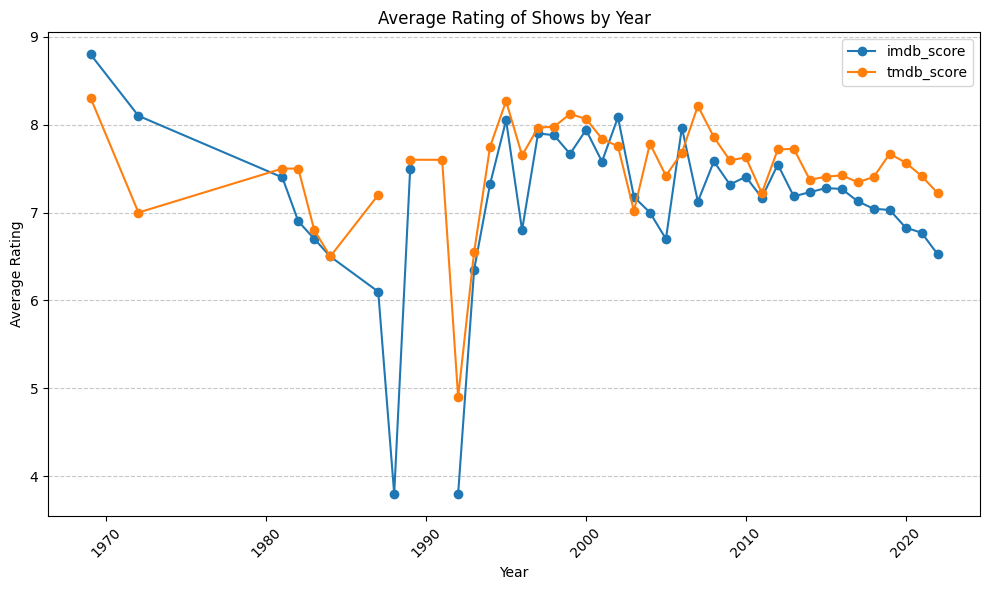

In [139]:
# Rating of movies and shows over time
score_columns = ['imdb_score','tmdb_score']
avg_movie_ratings = movies.groupby('release_year')[score_columns].mean()
avg_show_ratings = shows.groupby('release_year')[score_columns].mean()

# Plot histogram
def plot_avg_rating_by_year(avg_ratings, type):
    plt.figure(figsize=(10, 6))
    
    for column in score_columns:
        plt.plot(avg_ratings.index, avg_ratings[column], marker='o', linestyle='-', label=column)
    
    plt.title('Average Rating of '+ type +' by Year')
    plt.xlabel('Year')
    plt.ylabel('Average Rating')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_avg_rating_by_year(avg_movie_ratings, 'Movies')
plot_avg_rating_by_year(avg_show_ratings, 'Shows')


In [117]:
actor_counts = combined_df['person_id'].value_counts()
actors_more_than_one_movie = actor_counts[actor_counts > 4].index

filtered_df = combined_df[combined_df['person_id'].isin(actors_more_than_one_movie)]

In [118]:
actor_avg_scores = filtered_df.groupby('name')['imdb_score'].mean().reset_index().dropna()
actor_avg_scores

,name,imdb_score
0,Aamir Khan,7.636842
1,Aanjjan Srivastav,6.216667
2,Aaron Eckhart,6.220000
3,Aaron Paul,8.175000
4,Aaron Yoo,6.000000
...,...,...
1349,Zoya Akhtar,7.040000
1350,Àlex Monner,5.900000
1351,Álvaro Cervantes,6.387500
1352,İlker Aksum,6.440000


In [119]:
top100Actors=actor_avg_scores.sort_values(by='imdb_score', ascending=False)
top100Actors=top100Actors.head(10)

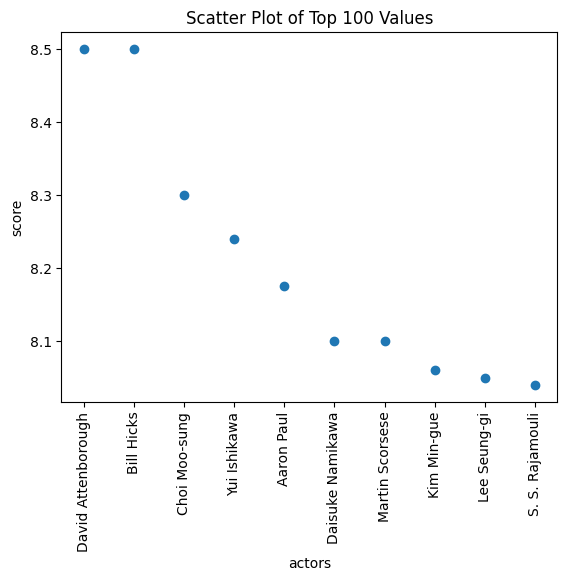

<Figure size 500x2000 with 0 Axes>

In [120]:
x = top100Actors['name']
y = top100Actors['imdb_score']

# Create scatter plot
plt.scatter(x, y)
plt.xlabel('actors')
plt.ylabel('score')
plt.title('Scatter Plot of Top 100 Values')
plt.xticks(rotation=90)
plt.figure(figsize=(5, 20))
plt.show()

TODO: Average score by genre

TODO: Sort Actors by score


Average IMDB score by genre (MOVIES)



/tmp/ipykernel_2197/2718996849.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_scores_df['Genre'], y=average_scores_df['Average IMDb Score'], palette='viridis')


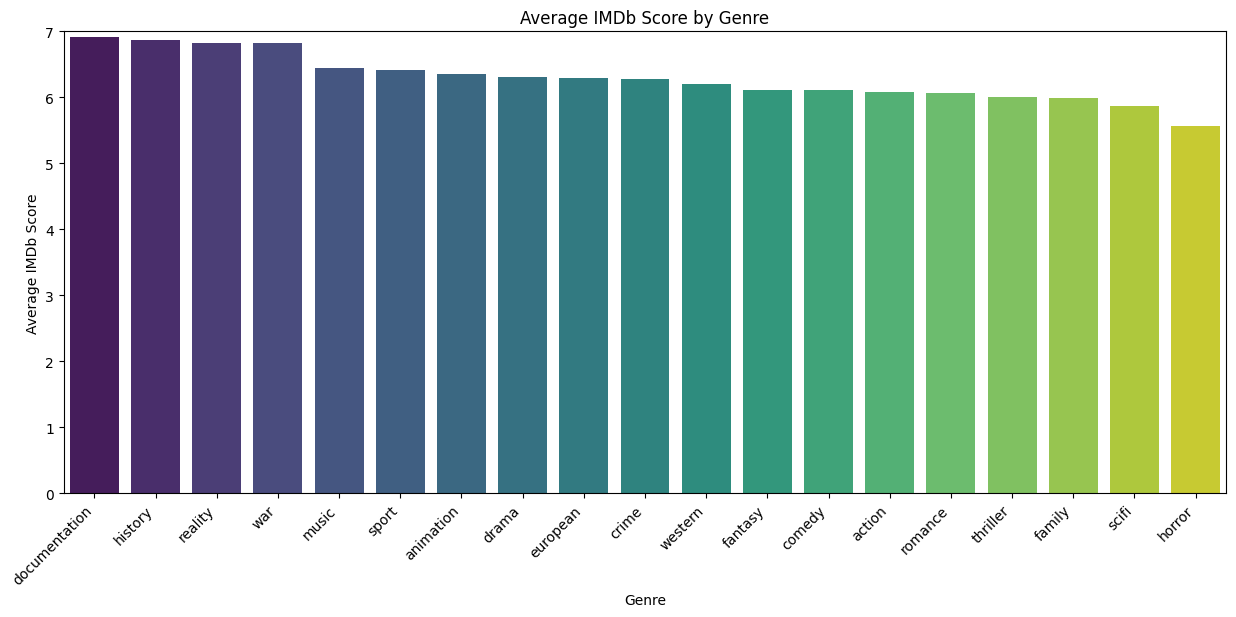

/tmp/ipykernel_2197/2718996849.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')


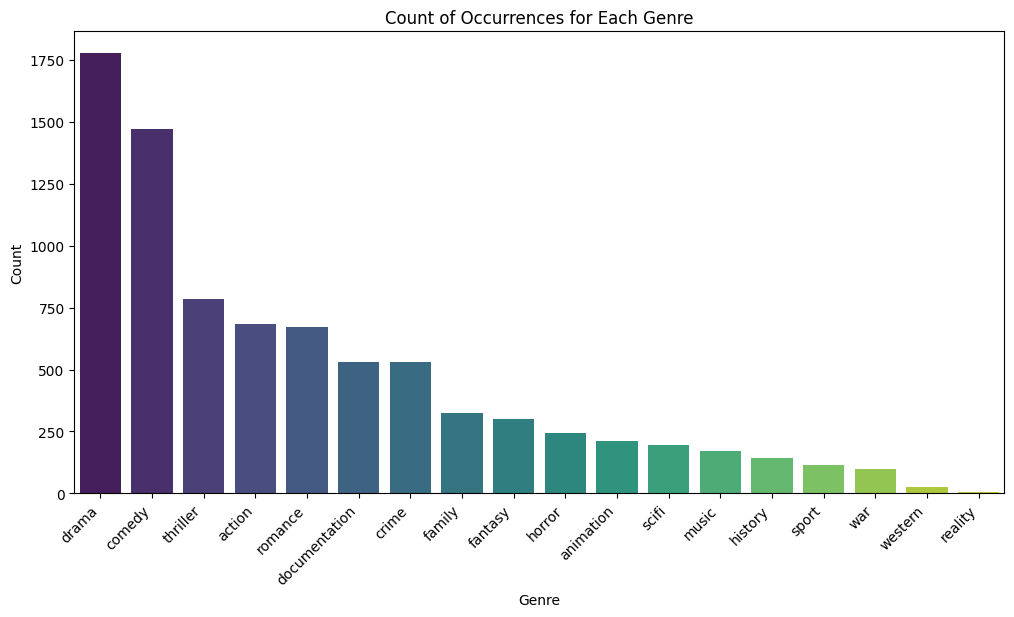

In [121]:
movies_genres_df = movies.copy().reset_index()

# Initialize an empty list to store all genres
genres_list = []

# Use ast.literal_eval to store all genres into a list
for x in movies_genres_df['genres']:
    y = ast.literal_eval(x)
    genres_list.extend(y)

# Remove duplicates
genres_set = list(set(genres_list))

# Create a DataFrame of genres with binary values (0 or 1)
genres_df = movies_genres_df['genres'].apply(lambda x: pd.Series([1 if genre in ast.literal_eval(x) else 0 for genre in genres_set], index=genres_set))

# Concatenate the new DataFrame with the original one
movies_genres_df = pd.concat([movies_genres_df, genres_df], axis=1)

# Drop NaN values in 'imdb_score' column
movies_genres_df = movies_genres_df.dropna(subset=['imdb_score'])

# Drop the 'genres' column
movies_genres_df = movies_genres_df.drop('genres', axis=1)

# Drop duplicates based on the 'id' column
movies_genres_df = movies_genres_df.drop_duplicates(subset='id')
movies_genres_df.reset_index(drop=True, inplace=True)

# Calculate the average IMDb score for each genre
average_scores_by_genre = {}
for genre in genres_set:
    genre_columns = [col for col in movies_genres_df.columns if genre in col]
    average_scores_by_genre[genre] = movies_genres_df[movies_genres_df[genre_columns].any(axis=1)]['imdb_score'].mean()

# Convert the result into a DataFrame
average_scores_df = pd.DataFrame(list(average_scores_by_genre.items()), columns=['Genre', 'Average IMDb Score'])

# Sort genres by average score in descending order
average_scores_df = average_scores_df.sort_values(by='Average IMDb Score', ascending=False)


# Plotting Average Scores
plt.figure(figsize=(15, 6))
sns.barplot(x=average_scores_df['Genre'], y=average_scores_df['Average IMDb Score'], palette='viridis')
plt.title('Average IMDb Score by Genre')
plt.xlabel('Genre')
plt.ylabel('Average IMDb Score')
plt.ylim(0,7)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

genre_counts = movies_genres_df.iloc[:, 18:].sum()
genre_counts = genre_counts.sort_values(ascending=False)

# Plotting the count of occurrences for each genre
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('Count of Occurrences for Each Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

In [122]:
movies_genres_df

,index,id,title,type,description,release_year,age_certification,runtime,production_countries,imdb_id,...,western,history,drama,crime,scifi,documentation,comedy,music,reality,thriller
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,['US'],tt0075314,...,0,0,1,1,0,0,0,0,0,0
1,1,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,['US'],tt0068473,...,0,0,1,0,0,0,0,0,0,1
2,2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,['GB'],tt0071853,...,0,0,0,0,0,0,1,0,0,0
3,3,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['GB', 'US']",tt0061578,...,0,0,0,0,0,0,0,0,0,0
4,4,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['GB'],tt0079470,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3350,3642,tm1165179,Kongsi Raya,MOVIE,Jack - a Chinese chef-manager who is in-line t...,2022,NaN,102,['MY'],tt16806990,...,0,0,0,0,0,0,1,0,0,0
3351,3644,tm985215,Princess 'Daya'Reese,MOVIE,Reese is a con artist from Manila who dreams o...,2021,NaN,115,['PH'],tt13399802,...,0,0,0,0,0,0,1,0,0,0
3352,3645,tm1097142,My Bride,MOVIE,The story follows a young man and woman who go...,2021,NaN,93,['EG'],tt14216488,...,0,0,1,0,0,0,1,0,0,0
3353,3646,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,['NG'],tt13857480,...,0,0,1,0,0,0,0,0,0,0


Genres vs iMDB popularity (MOVIES)



{'drama': 61105475.0, 'crime': 27690209.0, 'action': 34922444.0, 'thriller': 43440824.0, 'fantasy': 11365045.0, 'comedy': 25994454.0, 'war': 6107839.0, 'romance': 15364879.0, 'western': 3260946.0, 'documentation': 2954786.0, 'history': 5911254.0, 'music': 3649459.0, 'family': 5035756.0, 'horror': 9584488.0, 'animation': 3490624.0, 'scifi': 13258911.0, 'sport': 2317001.0, 'reality': 72778.0}


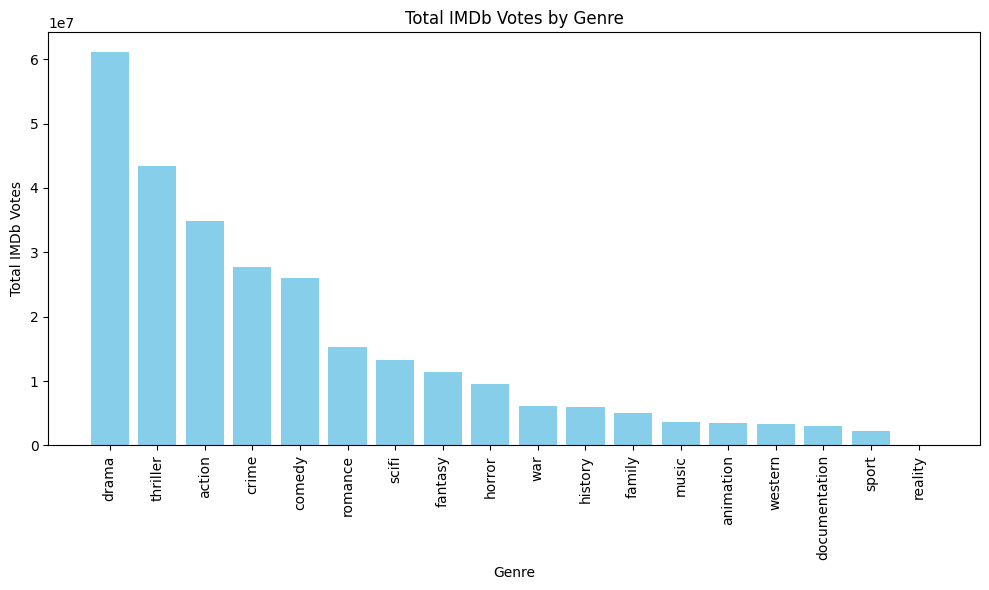

In [123]:
votes = {}

# Drop rows with missing values in the 'imdb_votes' column
cleaned_movies_df = movies_genres_df.dropna(subset=['imdb_votes'])

# Iterate over the index and values of the cleaned DataFrame
for index, row in cleaned_movies_df.iterrows():
    for genre in row.index[18:]:
        if row[genre] == 1:
            # Add the IMDb votes to the total for that genre
            votes[genre] = votes.get(genre, 0) + row['imdb_votes']

# Display the genre votes
print(votes)

# Convert the votes dictionary to a DataFrame for easier plotting
genre_votes_df = pd.DataFrame(list(votes.items()), columns=['Genre', 'Total Votes'])

# Sort the genre votes in descending order
genre_votes_df = genre_votes_df.sort_values(by='Total Votes', ascending=False)
genre_votes_df

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(genre_votes_df['Genre'], genre_votes_df['Total Votes'], color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Total IMDb Votes')
plt.title('Total IMDb Votes by Genre')
plt.xticks(rotation=90)  # Rotate genre labels for better readability
plt.tight_layout()
plt.show()

Count number of movies that are in each genre



In [124]:
movies_genres_df

num_genres = {}

for index, row in movies_genres_df.iterrows():
    for genre in row.index[18:]:
        if row[genre] == 1:
            num_genres[genre] = num_genres.get(genre, 0) + 1

num_genres
num_genres_df = pd.DataFrame(list(num_genres.items()), columns=['Genre', 'Number of Movies'])
num_genres_df = num_genres_df.sort_values(by='Number of Movies', ascending=False)
num_genres_df

,Genre,Number of Movies
0,drama,1776
5,comedy,1472
3,thriller,786
2,action,682
7,romance,673
9,documentation,530
1,crime,529
12,family,324
4,fantasy,300
13,horror,245
